In [3]:
import pandas as pd
import numpy as array

In [4]:
df = pd.read_csv("/home/randolphwanjiru/DSP4382/code/preprocessed_crash_data.csv")

## PCA

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select all numerical features (since preprocessing is done)
features = df.columns  # Select all columns

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply PCA without specifying n_components (to analyze variance)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(df_pca.shape[1])])

# Explained variance ratio to determine optimal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Display explained variance information
variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance": cumulative_variance
})

# Save PCA-transformed data if needed
#df_pca.to_csv("pca_transformed_data.csv", index=False)

# Show explained variance results
print("Explained Variance by PCA Components:\n", variance_df)


Explained Variance by PCA Components:
    Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.085582             0.085582
1                  PC2                  0.070711             0.156293
2                  PC3                  0.064175             0.220468
3                  PC4                  0.054634             0.275101
4                  PC5                  0.048541             0.323643
5                  PC6                  0.048318             0.371960
6                  PC7                  0.043412             0.415372
7                  PC8                  0.043214             0.458586
8                  PC9                  0.040241             0.498827
9                 PC10                  0.039710             0.538537
10                PC11                  0.038583             0.577120
11                PC12                  0.038424             0.615544
12                PC13                  0.037480   

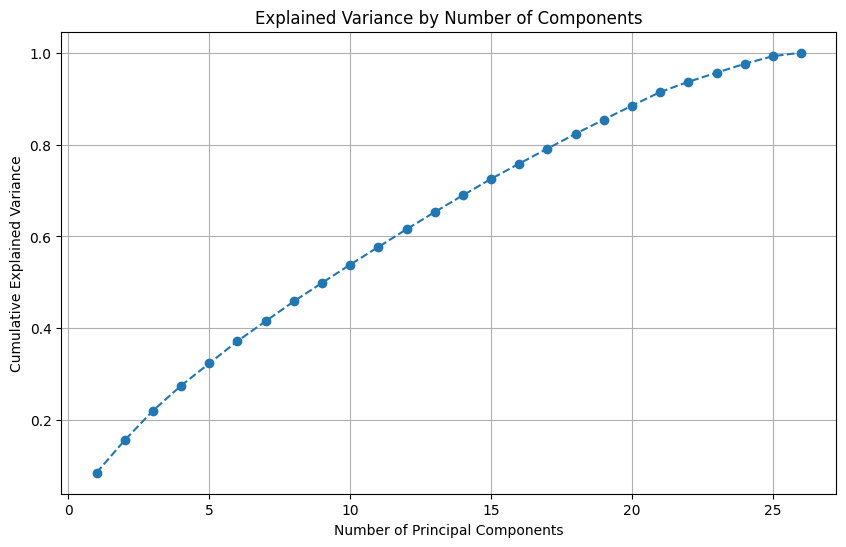

In [6]:
import matplotlib.pyplot as plt
import seaborn as snsplt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.grid()
plt.show()

In [7]:
# Select all features except the target
target = 'CRASH_SEVERITY'  # Change this to the actual target column
features = df.drop(columns=[target])

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA (Keep components that explain ~95% variance)
pca = PCA(n_components=15)  # Adjust based on explained variance results
features_pca = pca.fit_transform(features_scaled)

# Convert PCA-transformed data into a DataFrame
df_pca = pd.DataFrame(features_pca, columns=[f"PC{i+1}" for i in range(15)])
df_pca[target] = df[target]  # Add back the target variable

## Machine Learning

# Random Forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop(columns=[target]), df_pca[target], test_size=0.2, random_state=42)

In [9]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [10]:
# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)  # Get probabilities for ROC Curve

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize

In [12]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


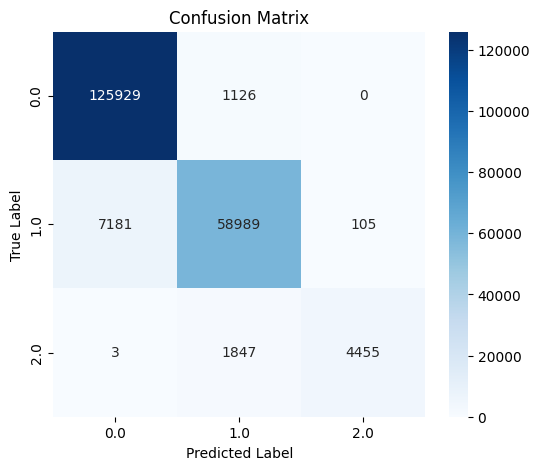

In [13]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
accuracy = accuracy_score(y_test, y_pred)  # Define the variable
print("Accuracy Report:", accuracy,report)

Accuracy Report: 0.9485961880431788               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    127055
         1.0       0.95      0.89      0.92     66275
         2.0       0.98      0.71      0.82      6305

    accuracy                           0.95    199635
   macro avg       0.96      0.86      0.90    199635
weighted avg       0.95      0.95      0.95    199635



In [15]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score for multiclass classification (one-vs-rest approach)
roc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Display the ROC AUC score
roc_score


0.9933565444826388

# XG BOOST

/home/randolphwanjiru/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:42:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9532346532421669
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    127055
         1.0       0.95      0.90      0.93     66275
         2.0       0.96      0.69      0.80      6305

    accuracy                           0.95    199635
   macro avg       0.95      0.86      0.90    199635
weighted avg       0.95      0.95      0.95    199635



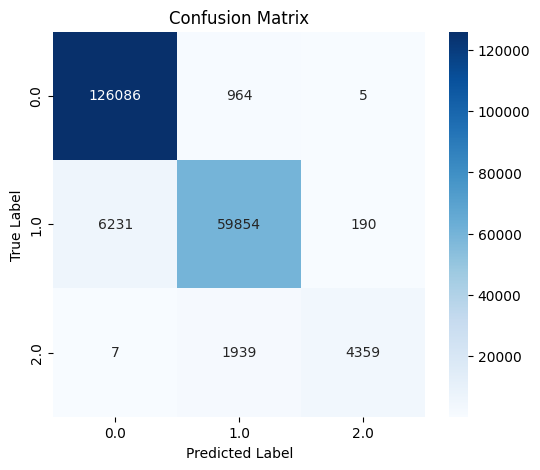

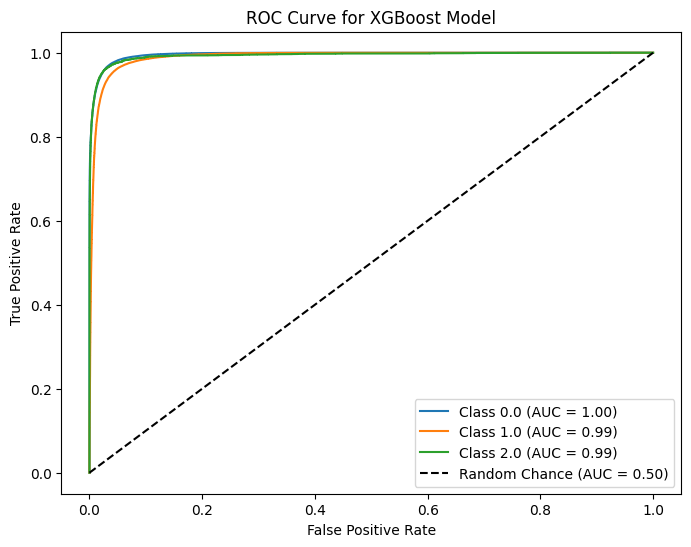

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost Classifier
clf = XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)  # For ROC AUC

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Accuracy and Classification Report
print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve for Multiclass
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {np.unique(y_test)[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend()
plt.show()



In [17]:
from sklearn.metrics import roc_auc_score

# Compute the ROC AUC score for multiclass classification (One-vs-Rest approach)
roc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the ROC AUC score
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.9930837595587595


## Implement Cat Boost 

# Light GBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 798540, number of used features: 15
[LightGBM] [Info] Start training from score -0.452237
[LightGBM] [Info] Start training from score -1.101652
[LightGBM] [Info] Start training from score -3.458564
LightGBM Accuracy: 0.9012597991334185
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94    127055
         1.0       0.92      0.77      0.84     66275
         2.0       0.89      0.59      0.71      6305

    accuracy                           0.90    199635
   macro avg       0.90      0.78      0.83    199635
weighted avg       0.90      0.90      0.90    199635



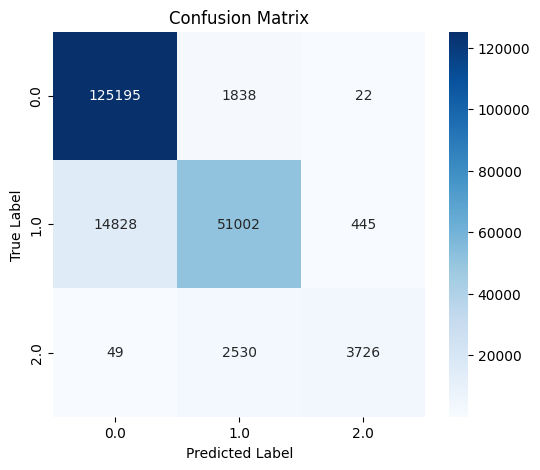

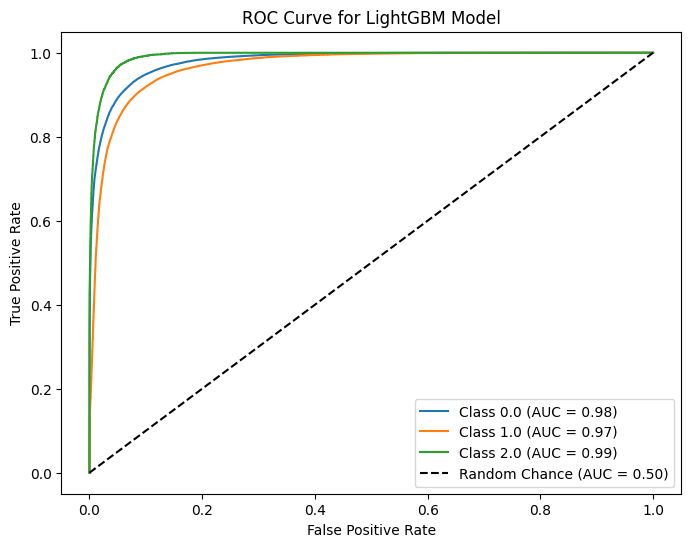

In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Train LightGBM Classifier
clf = LGBMClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)  # For ROC and AUC

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Accuracy and Classification Report
print("LightGBM Accuracy:", accuracy)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve for Multiclass
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {np.unique(y_test)[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LightGBM Model")
plt.legend()
plt.show()


## Over and Under Sampling Comparison

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure target is correctly assigned
target = df["CRASH_SEVERITY"]  # Replace with your actual target column name

NameError: name 'df' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure target is correctly assigned
target = df["CRASH_SEVERITY"]  # Replace with your actual target column name

# Ensure target is a pandas Series
print(type(target))  # Should output: <class 'pandas.core.series.Series'>

# Ensure features_pca and target have the same number of rows
print("Shape of features_pca:", features_pca.shape)
print("Length of target:", len(target))

features_pca = features_pca[df.index]  # Align with original DataFrame
target = target[df.index]  # Use the same index


# Step 1: Split the original dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

# Step 2: Apply Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Apply Undersampling (NearMiss)
nearmiss = NearMiss(version=1)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

# Define models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(n_estimators=50, max_depth=10, learning_rate=0.1, random_state=42),
}

# Initialize a results dictionary to compare performance
results = {}

# Step 4: Train and evaluate each model on original, SMOTE, and NearMiss data
for model_name, model in models.items():
    for sampling_method, (X_train_sampled, y_train_sampled) in {
        "Original": (X_train, y_train),
        "SMOTE": (X_train_smote, y_train_smote),
        "NearMiss": (X_train_nearmiss, y_train_nearmiss),
    }.items():
        # Train the model
        model.fit(X_train_sampled, y_train_sampled)

        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

        # Store results
        results[f"{model_name} ({sampling_method})"] = {
            "Accuracy": accuracy,
            "ROC AUC": roc_auc,
            "Classification Report": report,
        }

# Step 5: Visualize Results
for method, metrics in results.items():
    print(f"\n=== {method} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print("Classification Report:")
    report_df = pd.DataFrame(metrics["Classification Report"]).transpose()
    print(report_df)

    # Optional: Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {method}")
    plt.show()


<class 'pandas.core.series.Series'>
Shape of features_pca: (998175, 15)
Length of target: 998175
